#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Data Cleaning

In [4]:
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'},inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [7]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
# Deleting the Duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

#### EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

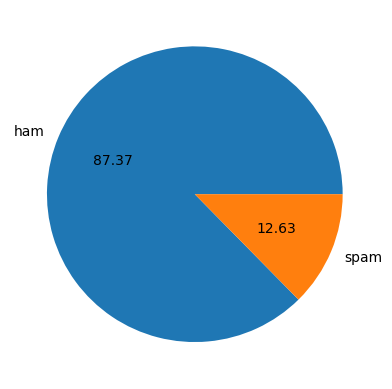

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

#### Data Modelling

In [19]:
X = df['text']
Y = df['target']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=51)

In [21]:
# Create a TF-IDF vectorizer to convert text messages to numerical features
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

In [22]:
# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
print(X_train)
print(X_train_features)

2378    Hi, Mobile no.  &lt;#&gt;  has added you in th...
347                       One small prestige problem now.
4617    Nvm... I'm going to wear my sport shoes anyway...
5484    , ,  and  picking them up from various points ...
3502     Free any day but i finish at 6 on mon n thurs...
                              ...                        
4260                             Pls dont forget to study
1793              You bad girl. I can still remember them
1820    I'll probably be by tomorrow (or even later to...
493                    What class of  &lt;#&gt;  reunion?
2190    Ooh, 4got, i'm gonna start belly dancing in mo...
Name: text, Length: 4135, dtype: object
  (0, 6960)	0.23679090973057437
  (0, 4888)	0.19690184465829053
  (0, 5975)	0.1978247130133296
  (0, 2853)	0.14608851820667398
  (0, 5737)	0.1530328304464379
  (0, 4975)	0.1910508716227189
  (0, 3091)	0.16784184296390897
  (0, 1813)	0.37763496605866687
  (0, 2905)	0.5496179018137107
  (0, 7271)	0.1794070774666851
  (0, 3

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on testing data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 96.27569528415961 %
Accuracy on testing data: 95.64796905222437 %
